In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import copy
import utilities
# import 
import scipy.stats as ss
from matplotlib import pyplot as plt

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
import keras
NUM_WORDS=2000 # only use top 1000 words
INDEX_FROM=3   # word index offset


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)


In [3]:
base_model = keras.models.load_model('./RNN_base_model.h5')

base_model.trainable = False

2022-01-24 20:06:34.050090: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# truncate and pad input sequences
max_review_length = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [10]:
# create the model
# embedding_vecor_length = 32
# base_model = Sequential()
# base_model.add(Embedding(NUM_WORDS, embedding_vecor_length, input_length=max_review_length))
# base_model.add(LSTM(100))
# base_model.add(Dense(1, activation='sigmoid'))
# base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# base_model.summary()
# base_model.fit(X_train, y_train, epochs=5, batch_size=128)
# Final evaluation of the model
scores = base_model.evaluate(X_test, y_test, verbose=1)
print(scores)

2021-12-01 09:44:34.110358: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


782/782 [==============================] - 16s 19ms/step - loss: 1.1075 - accuracy: 0.8541
[1.107534408569336, 0.8540800213813782]


In [5]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[2] ))



<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this has to be one of the worst films of the <UNK> when my friends i were watching this film being the <UNK> audience it was <UNK> at we just sat watched the first half an hour with our <UNK> touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally <UNK> into their <UNK> that they actually paid money they had <UNK> working to watch this <UNK> excuse for a film it must have looked like a great idea on <UNK> but on film it looks like no one in the film has a <UNK> what is going on crap acting crap costumes i can't get across how <UNK> this i

In [39]:
X_train_one_hot = []
for ins in X_train:
    one_hot = np.zeros(2000)
    one_hot[ins] = 1
    X_train_one_hot.append(one_hot)

In [40]:
X_test_one_hot = []
for ins in X_test:
    one_hot = np.zeros(2000)
    one_hot[ins] = 1
    X_test_one_hot.append(one_hot)

In [8]:
X_train[2]

[1,
 14,
 47,
 8,
 30,
 31,
 7,
 4,
 249,
 108,
 7,
 4,
 2,
 54,
 61,
 369,
 13,
 71,
 149,
 14,
 22,
 112,
 4,
 2,
 311,
 12,
 16,
 2,
 33,
 75,
 43,
 1829,
 296,
 4,
 86,
 320,
 35,
 534,
 19,
 263,
 2,
 1301,
 4,
 1873,
 33,
 89,
 78,
 12,
 66,
 16,
 4,
 360,
 7,
 4,
 58,
 316,
 334,
 11,
 4,
 1716,
 43,
 645,
 662,
 8,
 257,
 85,
 1200,
 42,
 1228,
 2,
 83,
 68,
 2,
 15,
 36,
 165,
 1539,
 278,
 36,
 69,
 2,
 780,
 8,
 106,
 14,
 2,
 1338,
 18,
 6,
 22,
 12,
 215,
 28,
 610,
 40,
 6,
 87,
 326,
 23,
 2,
 21,
 23,
 22,
 12,
 272,
 40,
 57,
 31,
 11,
 4,
 22,
 47,
 6,
 2,
 51,
 9,
 170,
 23,
 595,
 116,
 595,
 1352,
 13,
 191,
 79,
 638,
 89,
 2,
 14,
 9,
 8,
 106,
 607,
 624,
 35,
 534,
 6,
 227,
 7,
 129,
 113]

In [7]:
test_1 = np.where(X_train_one_hot[2] == 1)
# X_train_one_hot[2].index(1)
print(test_1)
print(' '.join(id_to_word[id] for id in test_1[0] ))

(array([   1,    2,    4,    6,    7,    8,    9,   11,   12,   13,   14,
         15,   16,   18,   19,   21,   22,   23,   28,   30,   31,   33,
         35,   36,   40,   42,   43,   47,   51,   54,   57,   58,   61,
         66,   68,   69,   71,   75,   78,   79,   83,   85,   86,   87,
         89,  106,  108,  112,  113,  116,  129,  149,  165,  170,  191,
        215,  227,  249,  257,  263,  272,  278,  296,  311,  316,  320,
        326,  334,  360,  369,  534,  595,  607,  610,  624,  638,  645,
        662,  780, 1200, 1228, 1301, 1338, 1352, 1539, 1716, 1829, 1873]),)
<START> <UNK> the a of to is in it i this that was for with but film on have be one at an they like or just has what when no time my really their had were we bad get into other first great how watch films being life acting your watching actually going can't must bit worst each our looks money watched audience everyone half idea else rest friends hour crap save looked yourself across started talking working le

In [63]:
print(' '.join(id_to_word[id] for id in X_train[2] ))


<UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> worst films <UNK> <UNK> 1990s <UNK> <UNK> friends <UNK> <UNK> watching <UNK> <UNK> being <UNK> target audience <UNK> <UNK> aimed <UNK> <UNK> <UNK> sat watched <UNK> <UNK> half <UNK> hour <UNK> our jaws touching <UNK> floor <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> rest <UNK> <UNK> <UNK> everyone else <UNK> <UNK> theatre <UNK> started talking <UNK> each <UNK> leaving <UNK> generally crying <UNK> <UNK> popcorn <UNK> <UNK> actually paid money <UNK> <UNK> <UNK> working <UNK> watch <UNK> feeble excuse <UNK> <UNK> <UNK> <UNK> must <UNK> looked <UNK> <UNK> <UNK> idea <UNK> paper <UNK> <UNK> <UNK> <UNK> looks <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> clue <UNK> <UNK> going <UNK> crap acting crap costumes <UNK> can't <UNK> across <UNK> <UNK> <UNK> <UNK> <UNK> watch save yourself <UNK> hour <UNK> bit <UNK> your life


In [31]:
weights = np.load('RNN_weights_output.npy')
np.shape(weights)

(1, 1, 2000, 1)

In [32]:
weights = weights[0, 0, :, 0]

In [13]:
# unimportant words
itemindex = np.where(abs(weights - 1)>=1)
len(itemindex[0])

727

In [35]:
rank = numpy.abs(numpy.subtract(weights, 1))
rank

array([0.90464413, 0.58526605, 0.11721897, ..., 0.73192596, 1.0664198 ,
       0.96040505], dtype=float32)

In [17]:
a = rank.argsort()
a

array([ 30,  38,  10, ...,  20,  22, 103])

In [18]:
print(' '.join(id_to_word[id] for id in a ))

be so br for <UNK> like recommended me with ending a to as law is budget long or given waste known pulled different he laugh 7 in trash say murder skip but could hear first check b know their begins until heavy tears strange smart its background <START> though up business collection however order animation blood animated avoid how moon anyway beat kill can reviews highly slasher fantastic front terrific thank run it's scene brother wrong very gotten missing working thing loose expect political today's missed please poorly event the heard under received 2 teacher worst lame miss actresses that then taylor day longer hope pointless last less girlfriend party save one unnecessary douglas spent born creative films country planet zombies and wanting joan toward vision town cover rip his indeed failed powers touch stories curious boring find jump supporting not boys mediocre wasted either adventure since horrible sucks greatest player little memories jackson york true luck terrible hilarious

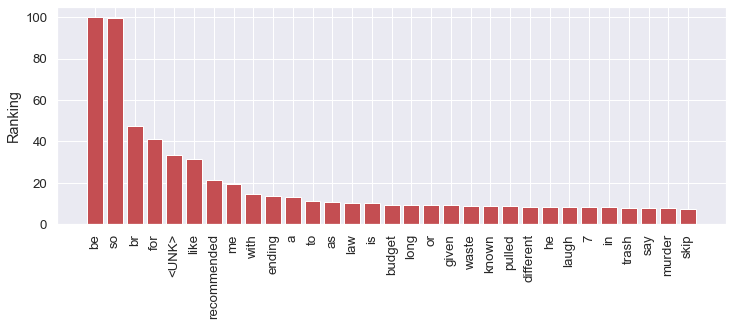

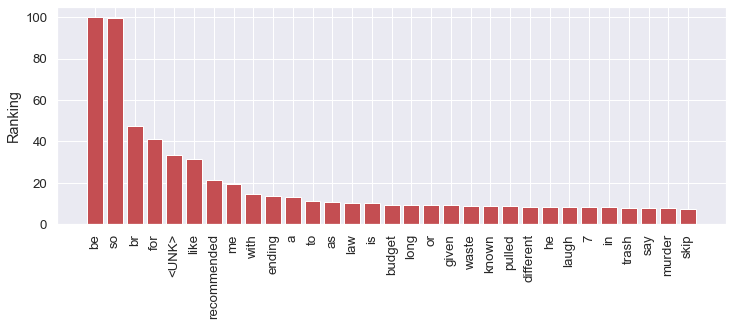

In [49]:
utilities.plot_feature_importance_reverse(id_to_word, 1/rank)

In [50]:
import keras
# keras.models.save_model(model, 'RNN_base_model.h5')
model = keras.models.load_model('RNN_base_model.h5')

In [51]:
model.evaluate(X_train, y_train)

782/782 [==============================] - 15s 19ms/step - loss: 0.2533 - accuracy: 0.8979


[0.2532716691493988, 0.8978800177574158]

In [23]:
rnn_weights = base_model.layers[0].weights[0]
rnn_weights

<tf.Variable 'embedding/embeddings:0' shape=(2000, 32) dtype=float32, numpy=
array([[-0.1198127 ,  0.02165966, -0.1500637 , ..., -0.13106845,
        -0.05553406,  0.04520743],
       [-0.18878992, -0.08134112, -0.03905275, ..., -0.0954524 ,
        -0.16307238, -0.01525595],
       [-0.01942877,  0.02867077,  0.00828877, ..., -0.02586515,
         0.03835607, -0.02403784],
       ...,
       [-0.41989487,  0.45781896, -0.3420995 , ..., -0.24855302,
        -0.3724463 ,  0.43562138],
       [ 0.50487024, -0.19321612, -0.17671143, ...,  0.10875862,
        -0.01810301,  0.00321491],
       [-0.17530409, -0.09983381, -0.14499888, ..., -0.16133213,
        -0.03263417, -0.04662052]], dtype=float32)>

In [24]:
rnn_weights = rnn_weights.numpy()

In [5]:
X_train_encoded = numpy.zeros((25000, 200, 2000))

for i in range(len(X_train)):
    for j in range(len(X_train[0])):
        X_train_encoded[i][j][X_train[i][j]] = 1
        


In [62]:
X_test_encoded = numpy.zeros((25000, 200, 2000))

for i in range(len(X_test)):
    for j in range(len(X_test[0])):
        X_test_encoded[i][j][X_test[i][j]] = 1

In [9]:
numpy.shape(X_test)

(25000, 200)

In [19]:
import tensorflow as tf
class Feature_Linear(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(Feature_Linear, self).__init__(**kwargs)
        

    def build(self, input_shape):
        if len(input_shape)==2:
            self.w = self.add_weight(
                shape=(1, input_shape[-1]),
                # initializer=tf.keras.initializers.RandomUniform(minval=3, seed=42),
                initializer=tf.keras.initializers.RandomUniform(),
                # initializer=tf.keras.initializers.Zeros(),
                trainable=True,
                # constraint=lambda x: tf.clip_by_value(x, -1, 1)
            )
        else:
            self.w = self.add_weight(
                shape=(2000, 1),
                initializer=tf.keras.initializers.Zeros(),
                trainable=True,
                # constraint=lambda x: tf.clip_by_value(x, 0, 1)
            )

    def get_config(self):
        config = super().get_config()
        return config

    def call(self, inputs, **kwargs):
        weights = tf.multiply(rnn_weights, self.w)
        return tf.matmul(inputs, weights)


In [58]:
feature_model.layers[1].set_weights(model.layers[1].get_weights())

In [59]:
feature_model.layers[2].set_weights(model.layers[2].get_weights())

In [ ]:
feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
feature_model.fit(X_train_encoded[:5000], y_train[:5000], epochs=3, batch_size=64, verbose=1)


In [25]:
import tensorflow as tf

feature_model = tf.keras.models.load_model("RNN_feature_model.h5", custom_objects={'Feature_Linear': Feature_Linear})


In [26]:
feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature__linear (Feature_Lin (None, 200, 32)           2000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 55,301
Trainable params: 2,000
Non-trainable params: 53,301
_________________________________________________________________


In [27]:
feature_model.layers[0].weights

[<tf.Variable 'feature__linear/Variable:0' shape=(2000, 1) dtype=float32, numpy=
 array([[-0.14786531],
        [ 0.3428153 ],
        [-0.42517176],
        ...,
        [-0.04327567],
        [ 0.04119211],
        [ 0.09218749]], dtype=float32)>]

In [ ]:
# Final evaluation of the model
scores = feature_model.evaluate(X_test_encoded, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [75]:
import keras
# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data(num_words=5000, skip_top=50)
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [76]:
decoded_words = " ".join(inverted_word_index[i] for i in range(1,5000))
decoded_words

"the and a of to is br in it i this that was as for with movie but film on not you are his have he be one all at by an they who so from like her or just about it's out has if some there what good more when very up no time she even my would which only story really see their had can were me well than we much been bad get will do also into people other first great because how him most don't made its then way make them too could any movies after think characters watch two films character seen many being life plot never acting little best love over where did show know off ever does better your end still man here these say scene while why scenes go such something through should back i'm real those watching now though doesn't years old thing actors work 10 before another didn't new funny nothing actually makes director look find going few same part again every lot cast us quite down want world things pretty young seems around got horror however can't fact take big enough long thought that's b

In [19]:
rank = feature_model.layers[0].weights[0].numpy()
rank = numpy.abs(numpy.subtract(rank, 1))

In [50]:
rank = numpy.reshape(rank, (len(rank)))
print(rank)
a = rank.argsort()[-100:]
a

[1.1478653 0.6571847 1.4251717 ... 1.0432757 0.9588079 0.9078125]


array([ 513, 1169,  309,  724,  828,  858, 1179,   34, 1679,    4, 1212,
        652,  658,  324,   29,  529,   68,  696,  422,  613, 1160,  760,
       1951, 1260, 1873,  341, 1645,  687,  965, 1041,   35,  173, 1286,
        553,  270,  260,   79,  546,  366,  245,   19,  872, 1471,   51,
          0,  618, 1205,  561,  240, 1902,  388,  393, 1400,  190,  313,
         33, 1849,  637,  633,  136,  137,   74, 1376,  419,  268,  914,
        117,  315, 1673,  534,   63,  722, 1288,   56,  588,  291,  972,
       1112,  194,  220,  492, 1577,   65,  337,  625,  430,  516,  703,
        445,  799,  541, 1099,  628,  605,   15,  555,    2,   11,   36,
         21])

In [29]:
FI_words = " ".join(inverted_word_index[i] for i in a)
FI_words

'really upon thinks she please someone joke violent thought family works offers their completely david worse car cheap based editing voice moves english ok for god and this from not'

In [39]:
Case_words = " ".join(inverted_word_index[i] for i in x_train[0])
Case_words

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but wh

### Not important words

In [16]:
INDEX_FROM=3 

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3


word_to_id={k:(v+INDEX_FROM-1) for k,v in word_to_id.items()}

id_to_word = {value:key for key,value in word_to_id.items()}
# print(id_to_word)

# print(' '.join(id_to_word[id] for id in a ))

### Important ones

In [53]:
b = rank.argsort()[:100]
print(' '.join(id_to_word[id] for id in b ))

of out like i've done many 10 watch movie take to show so into feeling work some br no people characters should worst awful ever will any waste do go even great bad fighting wonderful guy might poorly one amazing have if worse about excellent boring poor minutes terrible fails pointless fantastic tell supposed or laughable character lame 7 loved perfect nothing mess horrible ridiculous movies favorite best 8 badly save make redeeming unfortunately superb made avoid why well end stupid highly dull come wasted crap instead there oh script plot beautiful money unfunny touching garbage unless 9 annoying wonderfully


In [54]:
c = rank.argsort()[-100:]

In [55]:
print(' '.join(id_to_word[id] for id in c ))

town company himself beyond kept wait slasher by member the aside opinion husband shot he viewer their supporting yes song follows mention dealing explain floor death deliver events personal agree an part walking anyway set having get myself until away with decided confused what <PAD> exactly shooting moment he's cuts moments face hey however house at mixed i'll usually scene while than thrown head screen joe little during 40 hour which entertainment purpose up murder year apart successful big almost son addition story fan whose boy kill earth evil sister blood choice david cut that roles <UNK> in they but


### Prove it - important words bank

In [ ]:
tf-idf

### WordCloud

## Next Project - RNN in abstract

### Random Forest

In [41]:
model_rf = RandomForestClassifier(random_state=3)
model_rf.fit(X_train_one_hot, y_train)

RandomForestClassifier(random_state=3)

In [42]:
preds = model_rf.predict(X_test_one_hot)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.8294


In [43]:
importance_idx = ss.rankdata(model_rf.feature_importances_)

In [19]:
" ".join(id_to_word[i] for i in importance_idx[::-1][:100])

"big what series time lot wasn't one about not director surprised score only little the again everything have money well for new because michael said still who i off thing character sure right head in special called hand itself led love film are take action else but real also at give date long plot video kids unfortunately part be had bit ways comes seen his <UNK> films behind days seem see how that old minutes a away war into life gave years compared outside between understand own there movies so strong attempts tale think worth screenplay family first perhaps find"

In [20]:
" ".join(id_to_word[i] for i in importance_idx[:100])

"eating saving <UNUSED> <START> public intense necessary epic treat moon hopes plots superman loose bland unknown discovered hits fu jackson ann ice prince sign loss featuring aware judge wind starting delightful memories pulled terribly cable floor partner guns today's wide gene blame unfunny blonde european kate responsible eat youth empty broken cars heroine keeping nick naturally somebody ass hadn't fred locations quiet screaming gotten conflict cuts adam realism capture saved kevin below field loses lies bits river kinda magnificent england cage tarzan finale heads originally soft horse gary creating reminds hated fail prove nonsense soap radio drunk witty search sucks"

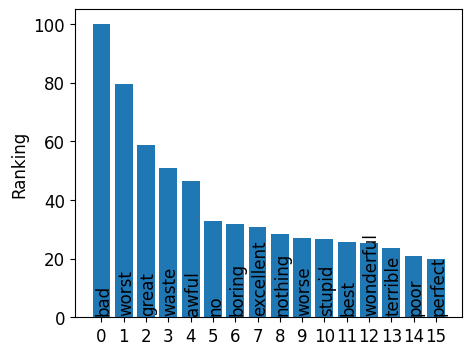

In [87]:
plt.style.use('default')

fig_FI_RF = plot_feature_importance(id_to_word, model_rf.feature_importances_, 15)

In [88]:
fig_FI_RF.savefig('./New_figures/{}_RF.png'.format(name_prefix), dpi=300, bbox_inches='tight')

### Permutation method

#### Change each word in the word bank in each sentance randomly.

In [47]:
weights_perm = np.load('RNN_perm_output.npy')
rank = weights_perm[:,0]
rank

array([3.85809779e-01, 1.41579332e-02, 6.89648271e-01, ...,
       4.94871114e-04, 7.00585719e-04, 5.89552335e-04])

In [12]:
" ".join(id_to_word[i] for i in rank)

"<UNUSED> clichés wedding gene teenage man's allow faces mission accident european partner pulled shocking kevin track treated doctor streets club six escape dealing adults scientist dreams event includes followed describe member wondering character's sister hoping notice building follows sees crime spoilers struggle ball energy nick youth consider alien capture laughed jones managed camp nearly army heroes difference al davis martial aware mad asked curious journey cops uses accept warning kong smith thus process alan limited whom woods sent thats met bigger moral bruce hopes appear dies direct spanish likes actions sick images returns ghost happens weren't intended fred plan cross police ship radio reviewers allowed hadn't business jr lover emotions band jeff proves parts thrown sounds students places aside suicide fit situation wind fell danny agent realized nightmare nicely wow issue dick hold whenever vampire japan victims technical choice apparent soldiers willing serial comic be

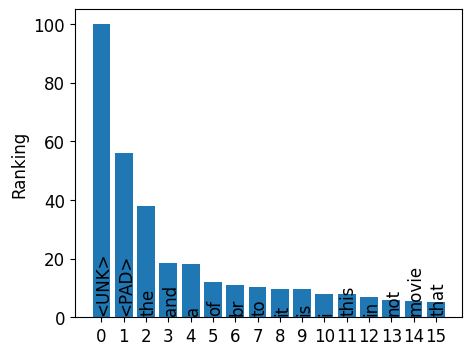

In [85]:
fig_FI_perm = plot_feature_importance(id_to_word, rank, 15)

In [86]:
fig_FI_perm.savefig('./New_figures/{}_perm.png'.format(name_prefix), dpi=300, bbox_inches='tight')


In [78]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(show_cols+1):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.ylabel('Ranking', fontsize=12)

    plt.bar(x_val, w_lr_sort)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(show_cols+1):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)
    plt.ylabel('Ranking', fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos




In [7]:
weights1 = np.load('RNN_weights_output_1.npy')
weights2 = np.load('RNN_weights_output_2.npy')
weights1 = weights1.reshape((1000,2000))
weights2 = weights2.reshape((1000,2000))
np.shape(weights1)

(1000, 2000)

In [8]:
weights_out = np.concatenate((weights1, weights2))

In [9]:
weights_std = np.std(weights_out, axis=0)
weights_std

array([0.00061151, 0.04106976, 0.06509471, ..., 0.0843712 , 0.06504337,
       0.04813837], dtype=float32)

In [10]:
weights_mean = weights_out.mean(axis=0)
weights_mean

array([0.09645646, 0.38612035, 0.82791466, ..., 0.23346642, 0.0073278 ,
       0.05645176], dtype=float32)

In [11]:
weights_scaled = np.abs(np.subtract(weights_out, 1)).mean(axis=0)
weights_scaled

array([0.90354425, 0.6138798 , 0.1723628 , ..., 0.7665343 , 0.9926729 ,
       0.9435478 ], dtype=float32)

In [74]:
a = weights_scaled.argsort()

print(' '.join(id_to_word[id] for id in a ))

for me br like <UNK> so be with recommended a laugh ending to or as is long could law he in first b working country pulled budget up until but say however check smart 7 that under though known waste arts front given political order know murder business <START> expect background collection animation begins hear it's animated kill teacher their i'd avoid strange mixed last different planet wrong odd supporting boys films tears less can worth lame heard spent its longer the scene blood one reviews anyway actresses skip day thing deal highly terrific indeed worst then york loose very trash girlfriend event moon brother and find how touch sequel his gotten heavy theme taylor 2 awful missed received jump going unfunny better slightly shouldn't luck since town let party wonderfully missing mediocre wasted there poorly yet at curious greatest despite unique entertaining match has ridiculous kate about toward thank year creative run horrible pointless fantastic hope powers masterpiece kinda int

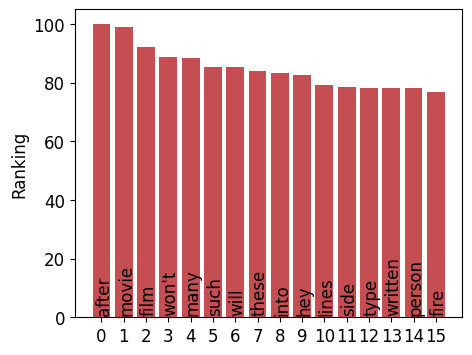

In [79]:
fig_FI_Weight_sacled = plot_feature_importance_reverse(id_to_word, np.abs((weights_scaled)), 15)

In [80]:
name_prefix = 'RNN'

fig_FI_Weight_sacled.savefig('./New_figures/{}_VT_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

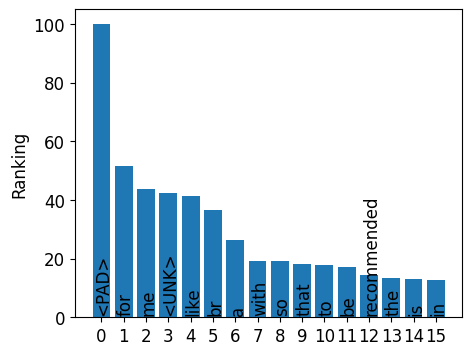

In [81]:
weights_std[3] = 0.00000000000001
fig_FI_VT = plot_feature_importance(id_to_word, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)

In [82]:
fig_FI_VT.savefig('./New_figures/{}_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [51]:
from scipy.linalg import lu
from scipy.linalg import solve

weights_out = np.insert(weights_out, 0, np.ones(2000), 0)
pl, weights_contribution = lu(weights_out, permute_l=True)

In [52]:
out = solve(weights_contribution[:2001], np.ones(2000))
out

array([238.74075952, -11.28891831,   3.53507014, ...,  -0.47062375,
        -1.26654444,   0.97378652])

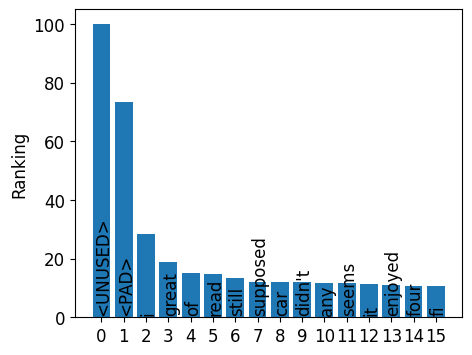

In [83]:
fig_FI_contribution_cal = plot_feature_importance(id_to_word, np.abs(out), 15)

In [84]:
fig_FI_contribution_cal.savefig('./New_figures/{}_cc.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

## Feature elemination

In [55]:
def feature_selection(X, y, feature_importance):
    
    index = np.where(feature_importance>1)
    X[index] = 0
    print(X)
    
    embedding_vecor_length = 32
    base_model = Sequential()
    base_model.add(Embedding(NUM_WORDS, embedding_vecor_length, input_length=max_review_length))
    base_model.add(LSTM(100))
    base_model.add(Dense(1, activation='sigmoid'))
    base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    base_model.summary()
    history = base_model.fit(X_train, y_train, epochs=5, batch_size=128)
    return history
    

history_important_features = feature_selection(X_train, y_train, weights_scaled)

[[  5  25 100 ...  19 178  32]
 [  0   0   0 ...  16 145  95]
 [  0   0   0 ...   7 129 113]
 ...
 [  0   0   0 ...   4   2   2]
 [  0   0   0 ...  12   9  23]
 [  0   0   0 ... 204 131   9]]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           64000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 117,301
Trainable params: 117,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
196/196 [==============================] - 40s 196ms/step - loss: 0.5270 - accuracy: 0.7158
Epoch 2/5
196/196 [==============================] - 39s 197ms/step - loss: 0.3285 -

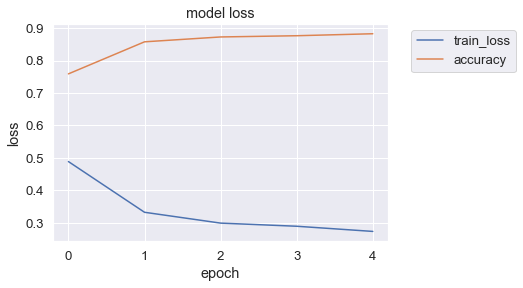

In [53]:
from matplotlib import pyplot as plt


plt.plot(history_important_features.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history_important_features.history['accuracy'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'accuracy'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(f'./RNN/base_model_loss_learning_curve.png', dpi = 300, bbox_inches='tight')
plt.show()

## Unimportant words

In [35]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(words):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    plt.savefig(f'./RNN/unimportant_words.png', dpi = 300, bbox_inches='tight')
    
index = np.where(weights_scaled>1)
print(len(index[0]))

# print("Creating word clouds...")
# positive_words=" ".join(imdb[imdb.label==1]['clean_text'].values)
# negative_words=" ".join(imdb[imdb.label==0]['clean_text'].values)

# generate_wordcloud(positive_words,"positive")
# generate_wordcloud(negative_words,"negative")

696


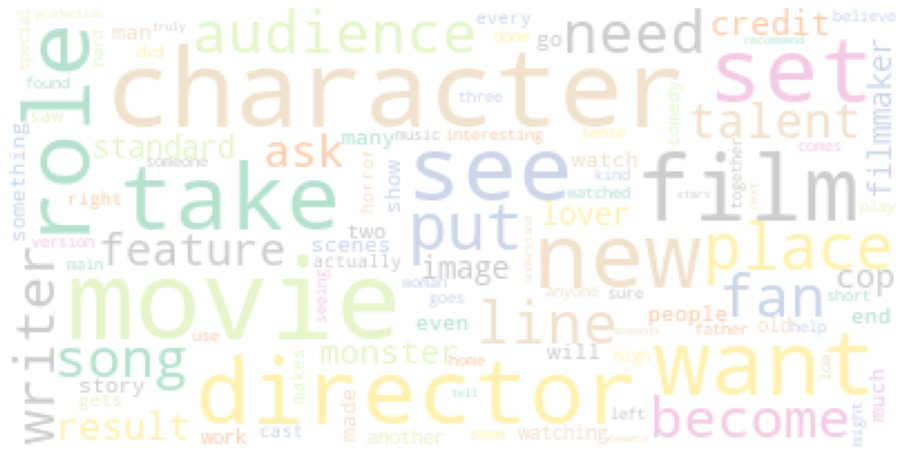

In [37]:
from matplotlib import pyplot as plt

unimportant_words = ' '.join(id_to_word[id] for id in index[0] )
generate_wordcloud(unimportant_words)